In [1]:
import pandas as pd
import plotly.express as px
from ipywidgets import Dropdown, SelectionSlider, Layout, HBox, VBox, interactive_output
from IPython.display import display, HTML
import pycountry

# === Data inladen ===
csv_path = "datasets/IHME_mental_real.csv"
df2 = pd.read_csv(csv_path)

# === Landen omzetten naar ISO3-codes ===
def get_iso3(name):
    try:
        return pycountry.countries.lookup(name).alpha_3
    except LookupError:
        return None

df2["Country"] = df2["location"].apply(get_iso3)

# === Waarden in juiste schaal zetten ===
df2["val_display"] = df2["val"]
df2.loc[df2["metric"] == "Percent", "val_display"] *= 100

# === Vaste schaal voor percentages ===
percent_max = df2.loc[df2["metric"] == "Percent", "val_display"].max()

# === Widget opties ===
years = sorted(df2["year"].unique())
sexes = sorted(df2["sex"].unique())
metrics = sorted(df2["metric"].unique())

# === Plotfunctie ===
def plot_map(year, sex, metric):
    dff = df2[(df2["year"] == year) & (df2["sex"] == sex) & (df2["metric"] == metric)]
    print(f'y: {year} sex: {sex}')
    if dff.empty:
        print("Geen data beschikbaar voor deze selectie.")
        return
    
    if metric == "Percent":
        color_range = [0, percent_max]
    else:
        color_range = [df2["val_display"].min(), df2["val_display"].max()]
    
    fig = px.choropleth(
        dff,
        locations="Country",
        color="val_display",
        hover_name="location",
        color_continuous_scale="Reds",
        range_color=color_range,
        labels={"val_display": f"Prevalentie ({metric})"},
        title=f"Mental Disorders – {sex} – {metric} – {year}",
        width=1100,
        height=650
    )
    fig.update_layout(
        geo=dict(
            showframe=False,
            showcoastlines=True,
            projection_type="natural earth"
        ),
        margin=dict(l=0, r=0, t=50, b=0)
    )
    fig.show()

# === Widgets ===
year_slider = SelectionSlider(
    options=years,
    description="Jaar",
    continuous_update=False,
    layout=Layout(width="100%")
)

sex_dropdown = Dropdown(
    options=sexes,
    description="Sex",
    layout=Layout(width="200px")
)

metric_dropdown = Dropdown(
    options=metrics,
    description="Metric",
    layout=Layout(width="200px")
)

controls_top = HBox([sex_dropdown, metric_dropdown], layout=Layout(gap="20px"))
controls = VBox([controls_top, year_slider], layout=Layout(gap="15px", width="1000px"), _dom_classes=["vbox"])

interactive_plot = interactive_output(plot_map, {
    "year": year_slider,
    "sex": sex_dropdown,
    "metric": metric_dropdown
})

# === Styling met CSS ===
custom_css = """
<style>
.vbox {
    background-color: #f9f9f9;
    padding: 20px;
    border-radius: 12px;
    box-shadow: 0 0 10px rgba(0,0,0,0.1);
    width: fit-content;
    margin-bottom: 25px;
}

/* Dropdown styling */
.widget-dropdown select {
    background-color: white;
    border: 1px solid #ccc;
    border-radius: 8px;
    padding: 6px 12px;
    font-size: 14px;
}

/* Slider track */
.widget-selection-slider .slider {
    background-color: #ddd;
    height: 8px;
    border-radius: 4px;
}

/* Slider handle */
.widget-selection-slider .slider .slider-handle {
    background-color: #e74c3c;
    border-radius: 50%;
    width: 16px;
    height: 16px;
    margin-top: -4px;
}

/* Beschrijving labels */
.widget-label {
    font-weight: bold;
    font-size: 14px;
}

/* Responsive tweaks */
@media screen and (max-width: 768px) {
    .hbox {
        flex-direction: column !important;
        gap: 10px !important;
    }
}
</style>
"""

# === Weergeven ===
display(HTML(custom_css))
display(controls, interactive_plot)


Output()

In [2]:
import pandas as pd
import plotly.express as px
from ipywidgets import Dropdown, SelectionSlider, Layout, HBox, VBox, interactive_output
from IPython.display import display, HTML
import pycountry

# === Data inladen ===
csv_path = "datasets/IHME_mental_real.csv"
df2 = pd.read_csv(csv_path)
print(df2)

# === Landen omzetten naar ISO3-codes ===
def get_iso3(name):
    try:
        return pycountry.countries.lookup(name).alpha_3
    except LookupError:
        return None

df2["Country"] = df2["location"].apply(get_iso3)

df2["val_display"] = df2["val"]
df2.loc[df2["metric"] == "Percent", "val_display"] *= 100

# === Vaste schaal voor percentages ===
# percent_max = df2.loc[df2["metric"] == "Percent", "val_display"].max()

year = 2015
sex = 'Both'
metric = 'Rate'

dff = df2[(df2["year"] == year) & (df2["sex"] == sex) & (df2["metric"] == metric)]
# if dff.empty:
#     print("Geen data beschikbaar voor deze selectie.")

# if metric == "Percent":
#     color_range = [0, percent_max]
# else:
#     color_range = [df2["val_display"].min(), df2["val_display"].max()]

fig = px.choropleth(
    dff,
    locations="Country",
    color="val_display",
    hover_name="location",
    # color_continuous_scale="Reds",
    # range_color=color_range,
    # labels={"val_display": f"Prevalentie ({metric})"},
    # title=f"Mental Disorders – {sex} – {metric} – {year}",
    # width=1100,
    # height=650
)
# fig.update_layout(
#     geo=dict(
#         showframe=False,
#         showcoastlines=True,
#         projection_type="natural earth"
#     ),
#     margin=dict(l=0, r=0, t=50, b=0)
# )
fig.show()



         measure  location     sex       age             cause   metric  year  \
0     Prevalence  Thailand    Male  All ages  Mental disorders  Percent  2015   
1     Prevalence  Thailand  Female  All ages  Mental disorders  Percent  2015   
2     Prevalence  Thailand    Both  All ages  Mental disorders  Percent  2015   
3     Prevalence  Thailand    Male  All ages  Mental disorders     Rate  2015   
4     Prevalence  Thailand  Female  All ages  Mental disorders     Rate  2015   
...          ...       ...     ...       ...               ...      ...   ...   
8563  Prevalence     Sudan  Female  All ages  Mental disorders  Percent  2021   
8564  Prevalence     Sudan    Both  All ages  Mental disorders  Percent  2021   
8565  Prevalence     Sudan    Male  All ages  Mental disorders     Rate  2021   
8566  Prevalence     Sudan  Female  All ages  Mental disorders     Rate  2021   
8567  Prevalence     Sudan    Both  All ages  Mental disorders     Rate  2021   

               val         

C:\Users\Douwe Maljers\AppData\Local\Temp\ipykernel_26600\4079036108.py:84: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




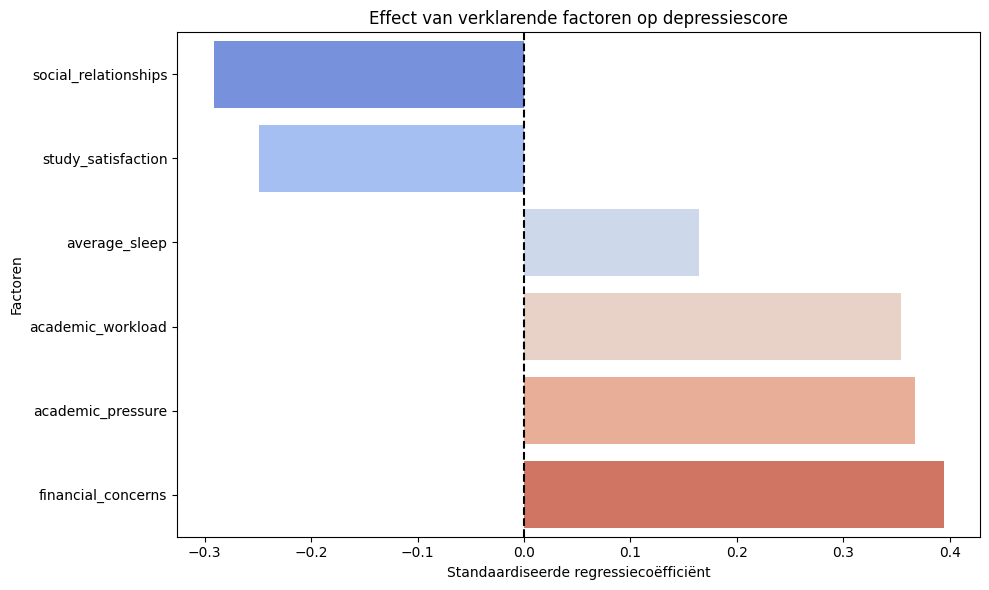

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates

# ⬇️ Laad je dataset (pas het pad aan naar jouw bestand)
da = pd.read_csv("datasets/MentalHealthSurvey.csv")

# 🔃 Voeg handmatig kolomnamen toe als ze ontbreken of overschreven moeten worden
da.columns = [
    'gender', 'age', 'university', 'degree_level', 'degree_major', 'academic_year',
    'cgpa', 'residential_status', 'campus_discrimination', 'sports_engagement',
    'average_sleep', 'study_satisfaction', 'academic_workload', 'academic_pressure',
    'financial_concerns', 'social_relationships', 'depression', 'anxiety',
    'isolation', 'future_insecurity', 'stress_relief_activities'
]

# 🔢 CGPA converteren naar gemiddelde getal (bijv. "3.0-3.5" → 3.25)
def convert_cgpa(value):
    if isinstance(value, str) and "-" in value:
        try:
            low, high = value.split("-")
            return (float(low) + float(high)) / 2
        except:
            return None
    try:
        return float(value)
    except:
        return None

da['cgpa'] = da['cgpa'].apply(convert_cgpa)

# 💤 Slaaprange ("4-6 hrs") → gemiddeld aantal uur
def convert_sleep(value):
    if isinstance(value, str) and "-" in value:
        try:
            nums = [int(s.replace("hrs", "").strip()) for s in value.split("-")]
            return sum(nums) / len(nums)
        except:
            return None
    try:
        return float(value)
    except:
        return None

da['average_sleep'] = da['average_sleep'].apply(convert_sleep)

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

# 🔢 Definieer relevante variabelen
features = [
    'academic_workload',
    'academic_pressure',
    'financial_concerns',
    'study_satisfaction',
    'social_relationships',
    'average_sleep'
]
target = 'depression'

# 🧼 Filter en converteer naar numeriek
reg_df = da[features + [target]].dropna().astype(float)

# 🧪 X en y scheiden
X = reg_df[features]
y = reg_df[target]

# 🧮 Standaardiseer features voor eerlijke coëfficiëntenvergelijking
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 🔁 Lineaire regressie
model = LinearRegression()
model.fit(X_scaled, y)

# 📊 Visualiseer coëfficiënten
coefs = pd.Series(model.coef_, index=features).sort_values()

plt.figure(figsize=(10, 6))
sns.barplot(x=coefs.values, y=coefs.index, palette="coolwarm", orient='h')
plt.axvline(0, color='black', linestyle='--')
plt.title("Effect van verklarende factoren op depressiescore")
plt.xlabel("Standaardiseerde regressiecoëfficiënt")
plt.ylabel("Factoren")
plt.tight_layout()
plt.show()
